In [1]:
import os
import re
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt

In [2]:
fileptr = open('/eos/user/a/abakshi/Logs/TopModules_296666')
lines   = fileptr.readlines()

In [3]:
for line in lines :
    print(line)

 top Modules NumberOfCluster

------------------------------------------------------

TID/MINUS Module 402668165 FEDCHs 147/ 5 147/ 4 147/ 3  value: 16.6934

TID/MINUS Module 402668169 FEDCHs 147/11 147/10 147/ 9  value: 16.5387

TID/MINUS Module 402668210 FEDCHs 147/62 147/61 147/60  value: 16.1256

TID/MINUS Module 402668209 FEDCHs 147/65 147/64 147/63  value: 16.0753

TEC/PLUS  Module 470339878 FEDCHs 324/24 324/25 324/26  value: 15.6325

TID/MINUS Module 402668170 FEDCHs 147/ 2 147/ 1 147/ 0  value: 15.6248

TEC/PLUS  Module 470339877 FEDCHs 324/44 324/45 324/46  value: 15.6193

TEC/MINUS Module 470079525 FEDCHs 177/44 177/45 177/46  value: 15.4552

TEC/MINUS Module 470079526 FEDCHs 177/24 177/25 177/26  value: 15.4092

TEC/PLUS  Module 470323493 FEDCHs 325/ 8 325/ 9 325/10  value: 15.1311

TEC/MINUS Module 470078501 FEDCHs 172/44 172/45 172/46  value: 15.1021

TEC/MINUS Module 470079013 FEDCHs 187/44 187/45 187/46  value: 14.9505

TID/MINUS Module 402668166 FEDCHs 147/ 8 147/ 7 14

In [4]:
a   = 'top Modules NumberOfCluster'
find = re.findall('top Modules \w+', a)
find

['top Modules NumberOfCluster']

In [5]:
line_count = 0
for line in lines :
    line = line.strip('\n')
    line_count += 1 
    find = re.findall('top Modules \w+', line)
    if (len(find) != 0 ) :
        print(str(find))
        print(line_count)

['top Modules NumberOfCluster']
1
['top Modules NumberOfDigi']
14630
['top Modules NumberOfOfffTrackCluster']
29323
['top Modules NumberOfOfffTrackCluster']
43952
['top Modules NumberOfOnTrackCluster']
58581
['top Modules StoNCorrOnTrack']
73205
['top Modules ChargePerCMfromTrack']
87829


In [6]:
feature_set = ['NumberOfCluster', 'NumberOfDigi', 'NumberOfOfffTrackCluster' , 'NumberOfOnTrackCluster', 'StoNCorrOnTrack', 'ChargePerCMfromTrack']

In [7]:
for line in lines :
    line = line.strip('\n')
    find = re.findall(feature_set[0], line)
    if (len(find) != 0 ) :
        print(str(find))

['NumberOfCluster']


In [8]:
re.findall('Module [0-9]+', lines[2])

['Module 402668165']

In [9]:
re.findall('value: [0-9]+.[0-9]+', lines[2])

['value: 16.6934']

In [10]:
Modules = []
Vals    = []

for i in range(len(lines)):
    line = lines[i]
    line = line.strip('\n')
    
    if (len(re.findall('Module [0-9]+', line)) == 0 or len(re.findall('value: [0-9]+.[0-9]+', line)) == 0) : continue
    
    mod = (re.findall('Module [0-9]+', line)[0])
    Modules.append(int(mod.strip('Module ')))

    val = (re.findall('value: [0-9]+.[0-9]+', line)[0])
    Vals.append(float(val.strip('value: ')))

In [172]:
np_val6  = np.array(Vals)

noc_val6  = np_val6[1:14626]

nod_val6  = np_val6[14627:29315]

nooc_val6 = np_val6[29316:44000]

ston_val6 = np_val6[73000:87710]

cprcm_val6 = np_val6[87710:]

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

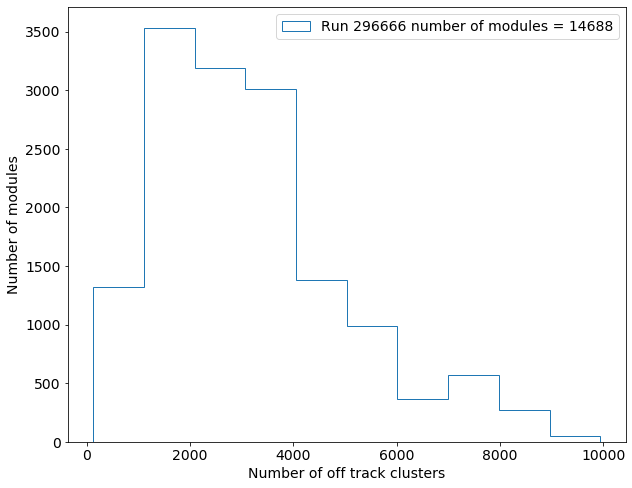

In [180]:
fig, ax = plt.subplots(figsize= (10,8))
ax.hist(nooc_val6, histtype='step', label='Run 296666 number of modules = 14688')
ax.set_xlabel('Number of off track clusters'    , fontsize=14)
ax.set_ylabel('Number of modules', fontsize=14)
#ax.set_xlim(4000,7000)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [31]:
fileptr = open('/eos/user/a/abakshi/Logs/TopModules_296665')
lines   = fileptr.readlines()

In [32]:
line_count = 0
for line in lines :
    line = line.strip('\n')
    line_count += 1 
    find = re.findall('top Modules \w+', line)
    if (len(find) != 0 ) :
        print(str(find))
        print(line_count)

['top Modules NumberOfCluster']
1
['top Modules NumberOfDigi']
14630
['top Modules NumberOfOfffTrackCluster']
29322
['top Modules NumberOfOfffTrackCluster']
43951
['top Modules NumberOfOnTrackCluster']
58580
['top Modules StoNCorrOnTrack']
73204
['top Modules ChargePerCMfromTrack']
87828


In [33]:
Modules = []
Vals    = []

for i in range(len(lines)):
    line = lines[i]
    line = line.strip('\n')
    
    if (len(re.findall('Module [0-9]+', line)) == 0 or len(re.findall('value: [0-9]+.[0-9]+', line)) == 0) : continue
    
    mod = (re.findall('Module [0-9]+', line)[0])
    Modules.append(int(mod.strip('Module ')))

    val = (re.findall('value: [0-9]+.[0-9]+', line)[0])
    Vals.append(float(val.strip('value: ')))

In [34]:
np_val5  = np.array(Vals)
noc_val5 = np_val[2:14629] 

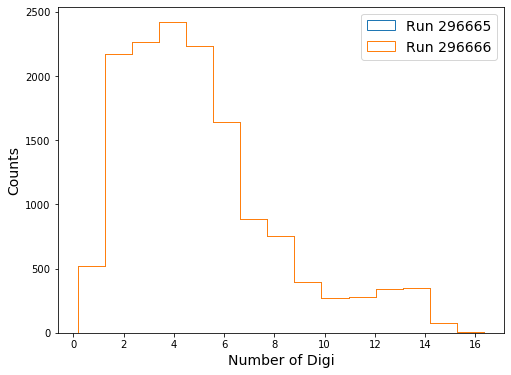

In [36]:
fig, ax = plt.subplots(figsize= (8,6))
ax.hist(noc_val[noc_val5 < 50], bins=15, histtype='step', label='Run 296665')
ax.hist(noc_val[noc_val6 < 50], bins=15, histtype='step', label='Run 296666')
ax.set_xlabel('Number of Digi', fontsize=14)
ax.set_ylabel('Counts'            , fontsize=14)
ax.legend(fontsize=14)

In [141]:
lines[87825:] 

['TIB       Module 369174732 FEDCHs 119/47 119/46         value: 17.293\n',
 'TEC/MINUS Module 470114800 FEDCHs 206/34 206/35         value: 15.1232\n',
 '------------------------------------------------------\n',
 ' top Modules ChargePerCMfromTrack\n',
 '------------------------------------------------------\n',
 'TIB       Module 369141861 FEDCHs 104/29 104/28 104/27  value: 12903.7\n',
 'TIB       Module 369141941 FEDCHs 106/83 106/82 106/81  value: 12197.4\n',
 'TIB       Module 369141942 FEDCHs 106/80 106/79 106/78  value: 11336.3\n',
 'TIB       Module 369141945 FEDCHs 106/77 106/76 106/75  value: 9930.52\n',
 'TEC/PLUS  Module 470393844 FEDCHs 313/38 313/39         value: 8797.35\n',
 'TOB       Module 436228281 FEDCHs 486/26 486/27         value: 7795.58\n',
 'TEC/PLUS  Module 470308596 FEDCHs 332/87 332/88         value: 7632.77\n',
 'TOB       Module 436233306 FEDCHs 482/74 482/75         value: 7574.02\n',
 'TEC/PLUS  Module 470311465 FEDCHs 346/60 346/61 346/62  value: 7510

In [45]:
nod_val6

array([  64.1263,   50.2035,   49.3881, ..., 9720.47  , 9508.53  ,
       9478.81  ])

In [156]:
max(Vals[87710:])

12903.7

In [50]:
len(Vals)

99884